# Project
# Revenue growth and AB testing

## Prioritization of hypotheses

In [1]:
# import libraries
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import matplotlib.pyplot as plt

In [2]:
try:
    hypot = pd.read_csv('/datasets/hypothesis.csv')

except Exception as e:
    hypot = pd.read_csv('/home/nesmakate/Downloads/Yandex Practicim/Projects/Project_Принятие решений в бизнесе/hypothesis.csv')

pd.set_option('display.max_colwidth', False)    
hypot

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# check the basic information about the data
hypot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Upon initial inspection, no issues were found - all data is recorded correctly, the formats are suitable, and there are indeed 9 hypotheses in the table, as stated in the data description.

### Prioritization based on the ICE system

In [4]:
# add a column with the ICE score to the table and sort the data in descending order of priority
hypot['ICE_score'] = round((hypot['Impact'] * hypot['Confidence']) / hypot['Efforts'],1)
hypot.sort_values(by='ICE_score',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


### Prioritization based on the RICE system

In [5]:
# add a column with the RICE score to the table and sort the data in descending order of priority
hypot['RICE_score'] = round(hypot['ICE_score']*hypot['Reach'],1)
hypot.sort_values(by='RICE_score',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE_score,RICE_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,39.9
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,8.8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,3.9
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


### Analysis of the results of two types of prioritization

According to the ICE system, the prioritized hypotheses are 8, 0, 7, 6, 2.
And according to the RICE system, they are 7, 2, 6, 0, 8.

The shift of some hypotheses up in the priority order in RICE was due to a high reach (Reach) indicator. This is the only parameter that differentiates RICE from ICE.

<font color='BlueViolet'>
<b>Conclusion</b></font>
Therefore, it is advisable to start with hypotheses 7, 2, 6, as they were already in the top 5 priority tasks according to ICE, and they have risen higher in the list according to RICE. These hypotheses will reach more users than hypotheses 8 and 0, which is important to consider.

## A/B test analysis

In [6]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except Exception as e:
    orders = pd.read_csv('/home/nesmakate/Downloads/Yandex Practicim/Projects/Project_Принятие решений в бизнесе/orders.csv')
    visitors = pd.read_csv('/home/nesmakate/Downloads/Yandex Practicim/Projects/Project_Принятие решений в бизнесе/visitors.csv')

In [7]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
# check the basic information about the data
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
# check the basic information about the data
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [10]:
# check the basic information about the data
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
# check number of duplicates
print(sum(orders.duplicated()),sum(visitors.duplicated()))

0 0


In [12]:
# change column format with dates
orders['date'] = pd.to_datetime(orders['date']).dt.date
visitors['date'] = pd.to_datetime(visitors['date']).dt.date

# change column names to one style
orders = orders.rename(columns = {'transactionId' : 'transaction_id',
                                  'visitorId' : 'visitor_id'})

**Теперь изучим подробне данные с результатами A/B-теста**

In [13]:
print('Groups of test from orders:',orders['group'].unique())
print('Groups of test from visitors:',visitors['group'].unique())

Groups of test from orders: ['B' 'A']
Groups of test from visitors: ['A' 'B']


In [14]:
min_date = visitors['date'].min()
max_date = visitors['date'].max()
print(f'first date of test: {min_date}\nlast date of test: {max_date}')

first date of test: 2019-08-01
last date of test: 2019-08-31


In [15]:
# get number of visitors, included into both test groups
mixed_visitors = orders.groupby('visitor_id')['group'].nunique()
mixed_visitors = len(mixed_visitors.loc[lambda x : x > 1])
# get number of visitors
count_visitors = len(orders['visitor_id'].unique())
percent_mixed = mixed_visitors / count_visitors 

print(f'All visitors:{count_visitors}\nVisitors in both groups:{mixed_visitors}\nPercantage of such visitors:{"{0:.1%}".format(percent_mixed)}')

All visitors:1031
Visitors in both groups:58
Percantage of such visitors:5.6%


There are users who are in both test groups. They make up only 5.6% of the total. It's not possible to make a fair assessment of the results for such users, so we will remove them from the data.

In [16]:
# make a list of visitors
delete_visitors = orders.groupby('visitor_id')['group'].nunique().loc[lambda x : x > 1]
# cleane file - order from such visitors by id
orders = orders[np.logical_not(orders['visitor_id'].isin(delete_visitors.index))]

count_visitors = len(orders['visitor_id'].unique())
print(f'Count of visitors:{count_visitors}')

Count of visitors:973


No critical issues with the data were found. There were no clear duplicates either. However, 5.6% of the users were in both test groups. The data for these users was excluded for accurate analysis in the future. Only the date format in both tables and column names were corrected.

### Building cumulative metric charts

To create graphs, we need to accumulate data first. Let's prepare the data step by step

In [17]:
# create an array of unique date and test group value pairs to collect cumulative data
data_groups = orders[['date','group']].drop_duplicates() 
data_groups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Aggregate cumulative daily order data according to their test group

In [18]:
orders_cumulative = data_groups\
                    .apply(lambda x: orders[
                                            np.logical_and(orders['date'] <= x['date'], 
                                                           orders['group'] == x['group'])
                                           ]\
                                           .agg(
                                                {'date': 'max',
                                                'group': 'max',
                                                'transaction_id': 'nunique',
                                                'visitor_id': 'nunique',
                                                'revenue': 'sum'}
                                               ),axis=1
                          )\
                          .sort_values(by=['date', 'group'])

Similarly, obtain aggregated cumulative daily visitor data for the online store according to their test group

In [19]:
visitors_cumulative = data_groups\
                      .apply(lambda x: visitors[
                                                np.logical_and(visitors['date'] <= x['date'],
                                                               visitors['group'] <= x['group'])
                                                ]\
                                                .agg({'date': 'max',
                                                      'group': 'max',
                                                      'visitors': 'sum'}
                                                    ),axis=1
                            )\
                            .sort_values(by=['date', 'group'])

Now let's merge these two tables and make a dataframe 'data_cumulative' with columns:

- date: date;
- group: A/B test group (A or B);
- orders: cumulative number of orders for the specified date in the specified group;
- buyers: cumulative number of users who made at least one order on the specified date in the specified group;
- revenue: cumulative revenue for the specified date in the specified group;
- visitors: cumulative number of visitors to the online store on the specified date in the specified group."

In [20]:
data_cumulative = orders_cumulative.merge(
                                          visitors_cumulative, 
                                          left_on=['date', 'group'], 
                                          right_on=['date', 'group']
                                          )
# change columns names
data_cumulative.columns = ['date','group','orders','buyers','revenue','visitors']
data_cumulative.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,1432
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,2632
4,2019-08-03,A,66,60,346854,1845


In [21]:
# aggregate data for А and B groups separately
data_cumulative_A = data_cumulative[data_cumulative['group']== 'A']
data_cumulative_B = data_cumulative[data_cumulative['group']== 'B']

These dataframes will be used later to make cgarts

#### Cumulative revenue chart by groups

Text(0.5, 1.0, 'Cumulative revenue chart by groups')

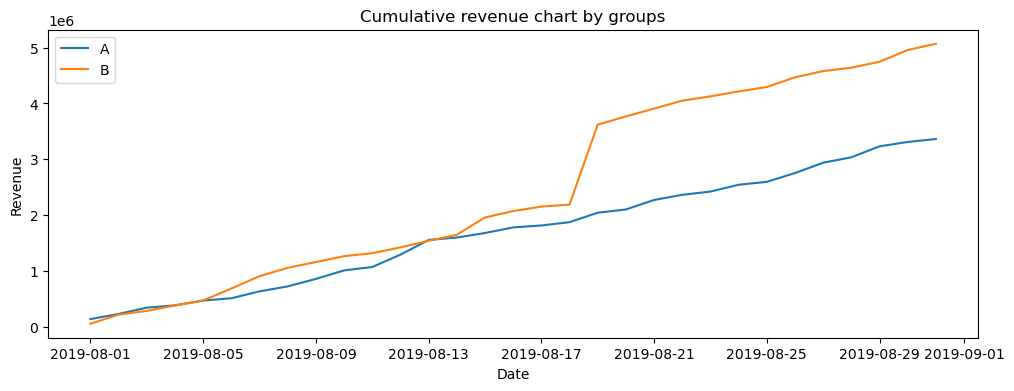

In [22]:
# make revenue chart by groups
plt.figure(figsize=(12, 4))

plt.plot(data_cumulative_A['date'],data_cumulative_A['revenue'],label='A')
plt.plot(data_cumulative_B['date'],data_cumulative_B['revenue'],label='B')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Cumulative revenue chart by groups')

The revenue for both groups gradually increases throughout the test. Group B is ahead in terms of total revenue compared to Group A, but there is a noticeable 'jump' in revenue between August 18, 2019, and August 21, 2012.

This may indicate spikes in the number of orders or the presence of very expensive orders in the sample. Later, we will check this period for anomalies.

#### Chart of cumulative average bill by groups.

Text(0.5, 1.0, 'Chart of cumulative average bill by groups.')

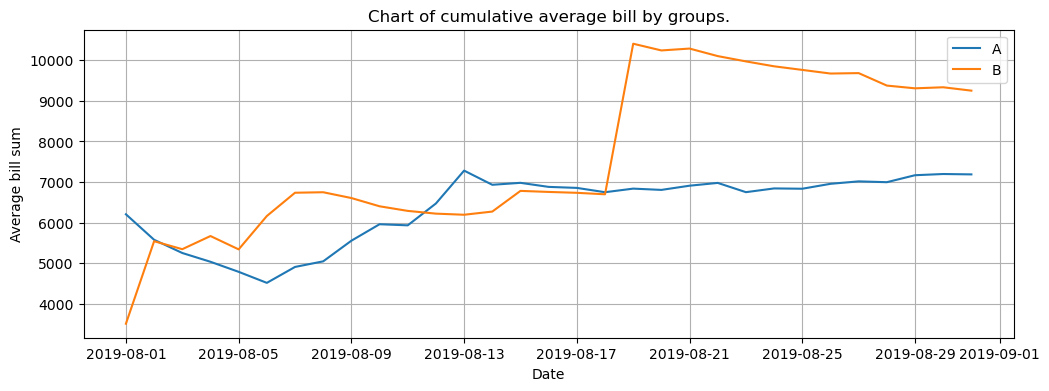

In [23]:
# make chart of cumulative average bill by groups.
plt.figure(figsize=(12, 4))

plt.plot(data_cumulative_A['date'],data_cumulative_A['revenue']/data_cumulative_A['orders'],label='A')
plt.plot(data_cumulative_B['date'],data_cumulative_B['revenue']/data_cumulative_B['orders'],label='B')

plt.legend()
plt.grid()
plt.xlabel('Date')
plt.ylabel('Average bill sum')
plt.title('Chart of cumulative average bill by groups.')

Both charts have a slight upward trend, but the average bill for both groups is quite unstable and clearly has outliers.

The average bill for Group A stabilizes only in the middle of the test period at around 7000 and increases to 7400. The average bill for Group B is highly unstable until the middle of the test period, and then it experiences a sharp jump from 7000 to over 10000, followed by a gradual decline.

Both groups have obvious outliers, but the most noticeable and concerning one is in Group B between August 18, 2019, and August 21, 2012. This same spike was evident on the revenue chart by groups. For Group A, it is worth checking two anomalies - August 13, 2019 (growth) and the period between August 5, 2019, and August 9, 2019 (drop).

#### Chart of the relative change in cumulative average check of Group B compared to Group A

Text(0.5, 1.0, 'Chart of the relative change in cumulative average check of Group B compared to Group A')

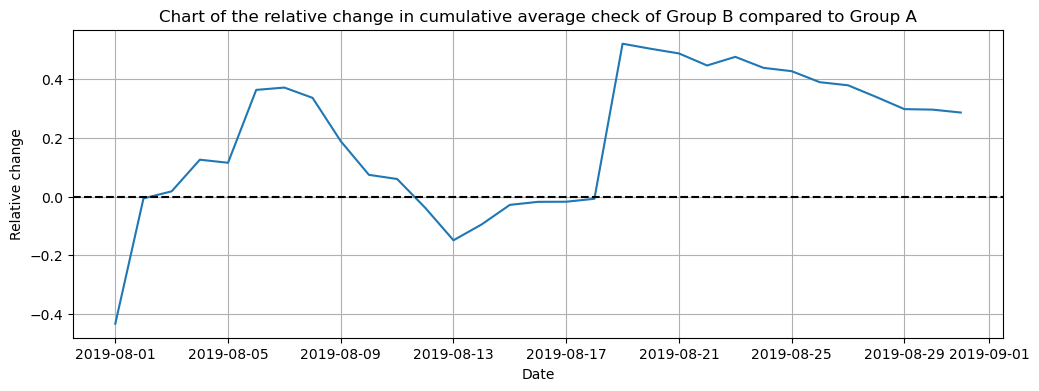

In [25]:
plt.figure(figsize=(12, 4))
# accumulate data
avg_cumulative_merged = data_cumulative_A[['date','revenue','orders']]\
                                        .merge(data_cumulative_B[['date','revenue','orders']], 
                                                 left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# the ratio of average check
plt.plot(avg_cumulative_merged['date'], 
         (avg_cumulative_merged['revenueB']/avg_cumulative_merged['ordersB'])/(avg_cumulative_merged['revenueA']/avg_cumulative_merged['ordersA'])-1)

# add axis X
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Relative change')
plt.title('Chart of the relative change in cumulative average check of Group B compared to Group A')

The two significant "jumps" and one significant "drop" on the graph of the relative change in the cumulative average check of group B to group A further confirm the presence of outliers in the data. Most likely, they are related to the sum of orders. However, we will also check the number of orders per group to exclude the option of "superfans of the online store" who place 10 times more orders than the average visitors.

We will investigate these outliers in the subsequent section of the project.

#### Chart of cumulative average number of orders per visitor by groups

Text(0.5, 1.0, 'Chart of cumulative average number of orders per visitor by groups')

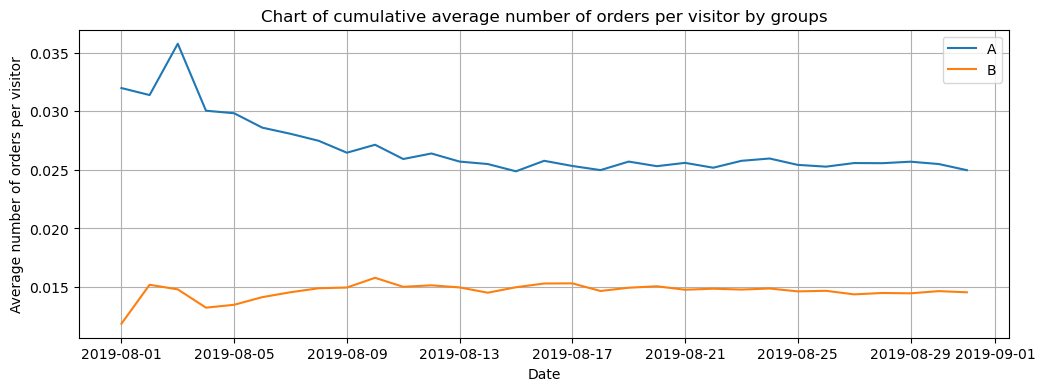

In [26]:
# make chart of cumulative average number of orders per visitor by groups
plt.figure(figsize=(12, 4))

plt.plot(data_cumulative_A['date'],data_cumulative_A['orders']/data_cumulative_A['visitors'],label='A')
plt.plot(data_cumulative_B['date'],data_cumulative_B['orders']/data_cumulative_B['visitors'],label='B')

plt.legend()
plt.grid()
plt.xlabel('Date')
plt.ylabel('Average number of orders per visitor')
plt.title('Chart of cumulative average number of orders per visitor by groups')

Judging by the graph, group A consistently has more orders per visitor. The graph stabilizes around August 10, 2019.

The average number of orders per visitor for group A is 0.025, and for group B, it's 0.015.

#### The chart of the relative change in the cumulative average number of orders per visitor for group B compared to group A.

In [27]:
# prevent the appearance of a warning sign  SettingWithCopyWarning
pd.options.mode.chained_assignment = None
# create columns with the average number of orders per visitor
data_cumulative_A['avg_count_ord'] = round(data_cumulative_A['orders'] / data_cumulative_A['visitors'],2)
data_cumulative_B['avg_count_ord'] = round(data_cumulative_B['orders'] / data_cumulative_B['visitors'],2)

Text(0.5, 1.0, 'The chart of the relative change in the cumulative average number of orders per visitor for group B compared to group A.')

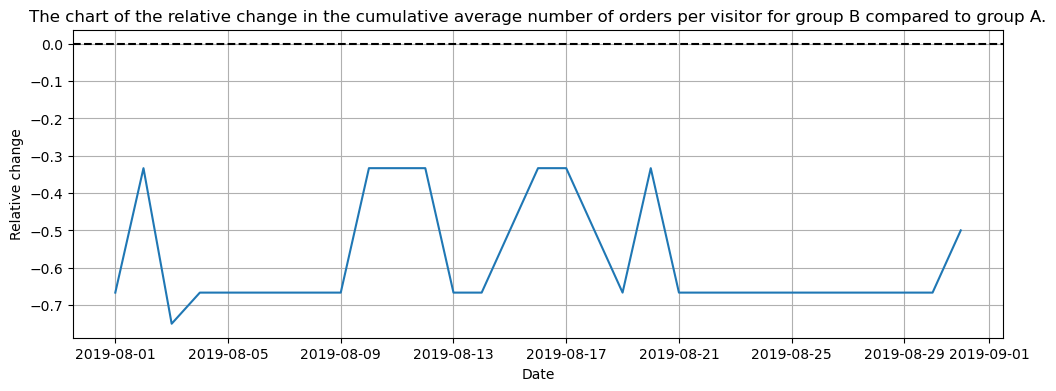

In [28]:
plt.figure(figsize=(12, 4))
# aggregate data
avgcount_cumulative_merged = data_cumulative_A[['date','avg_count_ord']]\
                                          .merge(data_cumulative_B[['date','avg_count_ord']], 
                                                 left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# the ratio of average bill
plt.plot(avgcount_cumulative_merged['date'],
         (avgcount_cumulative_merged['avg_count_ordB']/avgcount_cumulative_merged['avg_count_ordA'] - 1)
        )
# add axis X
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Relative change')
plt.title('The chart of the relative change in the cumulative average number of orders per visitor for group B compared to group A.')

The chart of relative changes confirms the conclusion from the previous chart - the average number of orders per visitor in group B is different from group A. The spikes on the chart may be related to outliers in the data.

<font color='BlueViolet'>
<b>Pre-conclusion </b></font>

Two user groups, A and B, were considered.

The cumulative revenue for both groups gradually increases during the test, and the cumulative average check is unstable but slightly rising.
The average check for group A ranges from 7000 to 7400, while for group B, it ranges from 7000 to 10000 (with a sharp jump in the sum on the chart).

Based on these metrics, group A appears to perform worse than group B. However, group A consistently has twice as many orders per visitor compared to group B.

Additionally, the chart of relative changes in the cumulative average check of group B to group A shows several significant fluctuations, indicating the presence of "outliers" in the data. These outliers are expected to be related to order totals.

### Creating scatter plots, defining percentiles, and studying anomalies

#### Scatter plot of the number of orders per visitor, calculating percentiles

[1. 1. 2.]


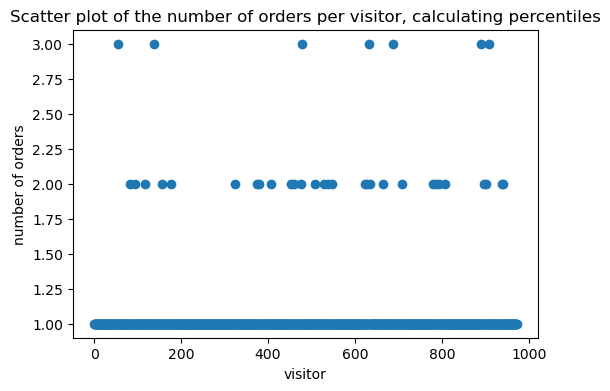

In [29]:
# gather data on the number of orders per visitor
data_orders = orders.groupby('visitor_id', as_index=False)\
                    .agg({'transaction_id':'nunique'})
data_orders.columns = ['visitor_id', 'n_orders']

# make a plot
plt.figure(figsize=(6, 4))
x_values = pd.Series(range(0, len(data_orders)))
plt.scatter(x_values, data_orders['n_orders']) 
plt.xlabel('visitor')
plt.ylabel('number of orders')
plt.title('Scatter plot of the number of orders per visitor, calculating percentiles')

# calculate percentiles for number of orders
print(np.percentile(data_orders['n_orders'], [90, 95, 99]))

Indeed, there are a significant number of outliers. Up to 95% of visitors place no more than 1 order, and only 1% place 2 orders. Based on the scatter plot, it can be inferred that users with 3 orders may be anomalies. There may be even more anomalies in the order values.

We will take this into account in the further data cleaning process.

#### Scatter plot of order revenue by users and percentile calculation.

[17990. 26785. 53904.]


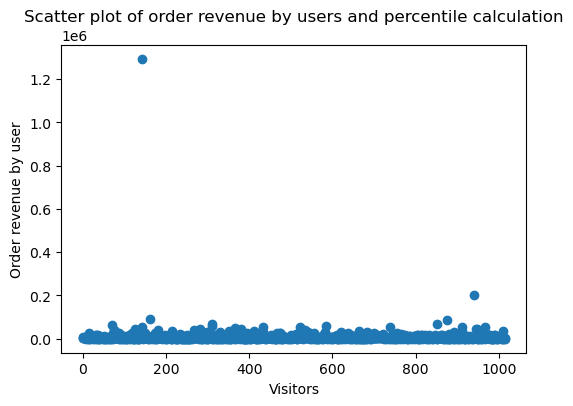

In [30]:
# gather data on order values by users 
data_revenue = orders.groupby('transaction_id', as_index=False)\
                    .agg({'revenue':'sum'})
data_revenue.columns = ['order_id', 'revenue']

# make a plot
plt.figure(figsize=(6, 4))
x_values = pd.Series(range(0, len(data_revenue)))
plt.scatter(x_values, data_revenue['revenue']) 
plt.xlabel('Visitors')
plt.ylabel('Order revenue by user')
plt.title('Scatter plot of order revenue by users and percentile calculation')

# calculate percentiles
print(np.percentile(data_revenue['revenue'], [90, 95, 99]))

By the chart of order sums, outliers are also noticeable. 95% of users place orders with a total value of no more than 26,785. And 1% order up to 53,904. This is a significant difference in costs.

However, due to a single high-cost order, almost the entire chart is compressed into one line. Let's examine the distribution of sums, limiting the data to a cost of up to 53,000.

Text(0.5, 1.0, 'The scatter plot of order revenue per visitor in both groups of test')

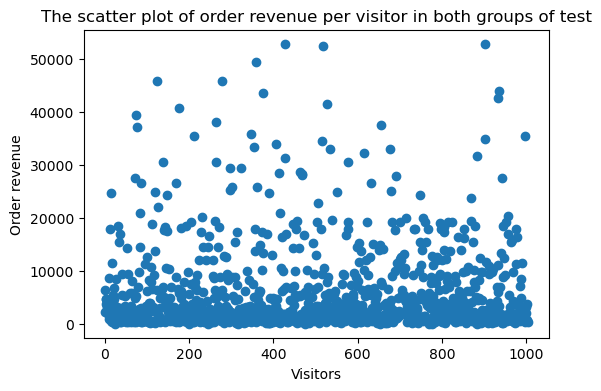

In [31]:
# gather data on revenue by order
data_revenue = orders.groupby('transaction_id', as_index=False)\
                    .agg({'revenue':'sum'})
data_revenue.columns = ['order_id', 'revenue']

# построим график
plt.figure(figsize=(6, 4))
x_values = pd.Series(range(0, len(data_revenue.loc[data_revenue['revenue']<=53000])))
plt.scatter(x_values, data_revenue.loc[data_revenue['revenue']<=53000,'revenue'])
plt.xlabel('Visitors')
plt.ylabel('Order revenue')
plt.title('The scatter plot of order revenue per visitor in both groups of test')

After examining the charts, it's clear that the order with a cost above 53,000 had a significant impact. Removing it, we can see that there are still expensive orders, but they are rare and unlikely to be anomalies. Therefore, limiting the data by this amount should be sufficient for valid results.

<font color='BlueViolet'>
<b>Pre-conclusion </b></font>

After calculating the percentiles and examining possible anomalies through scatter plots, it became clear that:
- There are many outliers in the number of orders per user.
- There is one exceptional anomaly in the order sum.

Up to 95% of visitors make no more than 1 order, and less than 1% make more than 2.
Up to 90% of visitors order items totaling no more than 17,990, and up to 95% order items totaling 26,785. Only 1% of users placed orders totaling more than 53,904.

It was investigated how distinct other anomalies are when removing orders with a sum above 53,000. Notably, there are still expensive orders, but they are rare and unlikely to be anomalies. Therefore, cleaning the data by removing around 1% due to the sum and less than 1% due to the number of orders should suffice.

### Statistical significance testing

#### Statistical Significance of Metrics for "Raw" Data

Having identified anomalies in the data earlier, let's check the statistical significance of differences in the average number of orders per user and the average check between the groups for the "raw" data.

**Statistical Significance of Differences in the Average Number of Orders per User** \
We will formulate hypotheses.\
Null hypothesis: There are no statistically significant differences in the average number of orders between the groups.\
Alternative hypothesis: There are statistically significant differences in the average number of orders between the groups.

We will introduce variables sampleA and sampleB, in which users from different groups will correspond to the number of orders. Those who did not place any orders will have zeros.

To do this, we will prepare the necessary data and structure them into tables.

In [32]:
# group the data on the number of orders and visitors by days (without accumulation).
orders_p_day_A = orders[orders['group']=='A'].groupby(['date'])\
                                             .agg({'transaction_id':'nunique'})\
                                             .merge(visitors[visitors['group']=='A'][['date', 'visitors']], 
                                                    left_on='date', right_on='date', how='left')

orders_p_day_B = orders[orders['group']=='B'].groupby(['date'])\
                                             .agg({'transaction_id':'nunique'})\
                                             .merge(visitors[visitors['group']=='B'][['date', 'visitors']], 
                                                    left_on='date', right_on='date', how='left')

# rename columns
orders_p_day_A.columns = ['date','ordersDayA','visitorsDayA']
orders_p_day_B.columns = ['date','ordersDayB','visitorsDayB']


# calculate number of orders per visitor for each group
orders_byvisitorsA = orders[orders['group'] == 'A']\
                           .groupby('visitor_id', as_index=False)\
                           .agg({'transaction_id': 'nunique'})
orders_byvisitorsB = orders[orders['group'] == 'B']\
                           .groupby('visitor_id', as_index=False)\
                           .agg({'transaction_id': 'nunique'})

# rename columns
orders_byvisitorsA.columns = ['visitor_id', 'orders']
orders_byvisitorsB.columns = ['visitor_id', 'orders']

The number of users with 0 orders is equal to the difference between the total number of visitors and the number of order records. Let's perform these calculations below and introduce the variables sampleA and sampleB.

In [33]:
# combine the tables, taking into account visitors who didn't make any orders.
sampleA = pd.concat([orders_byvisitorsA['orders'],
                     pd.Series(0, index=np.arange(orders_p_day_A['visitorsDayA'].sum() - len(orders_byvisitorsA['orders'])), 
                               name='orders')
                    ],axis=0
                   )
sampleB = pd.concat([orders_byvisitorsA['orders'],
                     pd.Series(0, index=np.arange(orders_p_day_B['visitorsDayB'].sum() - len(orders_byvisitorsB['orders'])), 
                               name='orders')
                    ],axis=0
                   )

We will perform the Mann-Whitney U test on the samples and examine the relative difference between the groups.

In [34]:
# show the results
print('p-value:',"{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('The relative difference in the average number of orders in group B compared to group A.:',"{0:.3f}".format((orders_p_day_B['ordersDayB'].sum()/orders_p_day_B['visitorsDayB'].sum())/(orders_p_day_A['ordersDayA'].sum()/orders_p_day_A['visitorsDayA'].sum())-1))

p-value: 0.938
The relative difference in the average number of orders in group B compared to group A.: 0.160


Since the p-value is greater than 0.05, we do NOT reject the null hypothesis, which states that there are no statistically significant differences in the average number of orders between the groups.\
However, there is still a difference in the average number of orders, with group B outperforming group A by 16%.

Let's formulate the hypotheses:

- **Null Hypothesis (H0)**: There are no statistically significant differences in the average order value between the groups.
- **Alternative Hypothesis (H1)**: There are statistically significant differences in the average order value between the groups.

In [35]:
# calculate average bill by groups
revenueA = orders[orders['group']=='A']['revenue']
revenueB = orders[orders['group']=='B']['revenue']

# results
print('p-value:',"{0:.3f}".format(st.mannwhitneyu(revenueA, revenueB)[1]))
print('The relative differences in the average order value between the groups:',"{0:.3f}".format(revenueB.mean()/revenueA.mean()-1))

p-value: 0.829
The relative differences in the average order value between the groups: 0.287


Since the p-value is more than 0.05, we do not reject the null hypothesis, which means that there are no statistically significant differences in the average order value between the groups. However, it's important to note that the average order value in group B is 28.7% higher than in group A.

<font color='BlueViolet'>
<b>Pre-conclusion</b></font>

There are no statistically significant differences between the groups, neither in terms of the average number of orders nor the average check. However, the relative difference between group B and group A is as follows:
- In the average number of orders: 16% better in group B.
- In the average check: 28% better in group B.

#### Statistical significance of metrics using "cleaned" data

Now we will conduct the same analysis of statistical significance, but this time we will take into account the "outliers" found in section 2.2 by cleaning the data from them.

The 99th percentile of the number of orders per user is 2. The 95th and 99th percentiles of the average check are 26,785 and 53,904, respectively.

We will consider users with more than 2 orders or orders with a total value of 42,353 rubles (98th percentile) and above as anomalous. This way, we will remove less than 1% of users with the highest number of orders and around 1% of users with expensive orders.

In [36]:
# make boundaries for data
bound_order = np.percentile(data_orders['n_orders'], [99])[0]
bound_rev = np.percentile(data_revenue['revenue'], [99])[0]
# make a data slice and obtain the IDs of anomalous users.
anomal_visitors = pd.concat([orders_byvisitorsA.loc[orders_byvisitorsA['orders']>bound_order,'visitor_id'],
                         orders_byvisitorsB.loc[orders_byvisitorsB['orders']>bound_order,'visitor_id'],
                         orders.loc[orders['revenue']>=bound_rev,'visitor_id']],
                        axis=0).reset_index(drop=True)
anomal_visitors = anomal_visitors.drop_duplicates().reset_index(drop=True)

# show count of visitors
print('Count of anomal visitors:',anomal_visitors.shape[0])

Count of anomal visitors: 19


Now let's gather the same dataset as in the previous section but already filtered to analyze statistical significance. We will assess how much these 19 users have influenced the results.

In [37]:
# aggregate filtered data of order number and bumber of visitors per day(without accumulation).
f_orders_p_day_A = orders[(orders['group']=='A') &\
                        (np.logical_not(orders['visitor_id'].isin(anomal_visitors)))
                       ].groupby(['date'])\
                        .agg({'transaction_id':'nunique'})\
                        .merge(visitors[visitors['group']=='A'][['date', 'visitors']], 
                               left_on='date', right_on='date', how='left')

f_orders_p_day_B =  orders[(orders['group']=='B') &\
                        (np.logical_not(orders['visitor_id'].isin(anomal_visitors)))
                       ].groupby(['date'])\
                        .agg({'transaction_id':'nunique'})\
                        .merge(visitors[visitors['group']=='B'][['date', 'visitors']], 
                               left_on='date', right_on='date', how='left')

# rename columns
f_orders_p_day_A.columns = ['date','ordersDayA','visitorsDayA']
f_orders_p_day_B.columns = ['date','ordersDayB','visitorsDayB']

# calculate number of orders per visitor by groups
f_orders_byvisitorsA = orders[(orders['group']=='A') &\
                              (np.logical_not(orders['visitor_id'].isin(anomal_visitors)))
                             ]\
                             .groupby('visitor_id', as_index=False)\
                             .agg({'transaction_id': 'nunique'})
f_orders_byvisitorsB = orders[(orders['group']=='A') &\
                              (np.logical_not(orders['visitor_id'].isin(anomal_visitors)))
                             ]\
                             .groupby('visitor_id', as_index=False)\
                             .agg({'transaction_id': 'nunique'})

# rename columns
f_orders_byvisitorsA.columns = ['visitor_id', 'orders']
f_orders_byvisitorsB.columns = ['visitor_id', 'orders']

In [38]:
# combine the tables, taking into account the visitors who did not place any orders.
f_sampleA = pd.concat([f_orders_byvisitorsA['orders'],
                     pd.Series(0, index=np.arange(f_orders_p_day_A['visitorsDayA'].sum() - len(f_orders_byvisitorsA['orders'])), 
                               name='orders')
                    ],axis=0
                   )
f_sampleB = pd.concat([f_orders_byvisitorsA['orders'],
                     pd.Series(0, index=np.arange(f_orders_p_day_B['visitorsDayB'].sum() - len(f_orders_byvisitorsB['orders'])), 
                               name='orders')
                    ],axis=0
                   )

We will perform the Mann-Whitney U test on the samples and examine the relative difference between the groups.

In [39]:
# results
print('the statistical significance of differences in the average check')
print('p-value:',"{0:.3f}".format(st.mannwhitneyu(f_sampleA, f_sampleB)[1]))
print('The relative difference in the average number of orders from Group B compared to Group A:',"{0:.3f}".format((f_orders_p_day_B['ordersDayB'].sum()/f_orders_p_day_B['visitorsDayB'].sum())/(f_orders_p_day_A['ordersDayA'].sum()/f_orders_p_day_A['visitorsDayA'].sum())-1))

the statistical significance of differences in the average check
p-value: 0.887
The relative difference in the average number of orders from Group B compared to Group A: 0.193


The p-value decreased slightly but is still greater than 0.05. Therefore, we can conclude that there are no statistically significant differences in the average number of orders between the groups based on the cleaned data (we didn't reject the null hypothesis). However, the relative difference increased by 3%. This means that anomalous users were underestimating the gap between Group B and Group A in terms of the average number of orders.

Next, let's check the average check for both groups.

In [40]:
#  calculate the average check for each group
f_revenueA =  orders[(orders['group']=='A') &\
                   (np.logical_not(orders['visitor_id'].isin(anomal_visitors)))
                  ]['revenue']

f_revenueB = orders[(orders['group']=='B') &\
                   (np.logical_not(orders['visitor_id'].isin(anomal_visitors)))
                  ]['revenue']

# results
print('Statistical significance of differences in the average check')
print('p-value:',"{0:.3f}".format(st.mannwhitneyu(f_revenueA, f_revenueB)[1]))
print('The relative difference in the average check from Group B compared to Group A:',"{0:.3f}".format(f_revenueB.mean()/f_revenueA.mean()-1))

Statistical significance of differences in the average check
p-value: 0.842
The relative difference in the average check from Group B compared to Group A: -0.014


As you can see, the p-value has increased only slightly; however, the relative difference in the average check has changed dramatically. Previously, Group B significantly surpassed Group A by 28%, but now these groups are almost equal (the average check of Group B is only 1% lower than that of Group A).

<font color='BlueViolet'>
<b>Conclusion based on clean data</b></font>

There are no statistically significant differences between the groups in terms of both the average number of orders and the average check. However, the relative difference between Group B and Group A is as follows:

In the average number of orders, Group B is better by 19%;
In the average check, Group A is better by 1%, but the difference is small.
Anomalous values underestimated the lead of Group B over Group A in the average number of orders and, moreover, led to a completely incorrect result regarding the average check. Outliers skewed the data, and that's why the initial verdict showed a significant lead of Group B in terms of the average check, although the real situation is different.

## Conclusions and decision-making

As initial data, three CSV files containing information about hypotheses, orders, and visitors of the online store were used.

During the initial data preprocessing, no critical issues were found, and all data was correctly recorded. However, 5.6% of users ended up in both test groups. These users were excluded from the data for correct analysis. Column names were also renamed for convenience, and date column formats were changed.

The test lasted for a month, from 2019-08-01 to 2019-08-31, and users were divided into two groups: A and B. In total, 973 users participated in the test.

**Hypothesis prioritization**
Hypothesis prioritization was assessed using the ICE and RICE frameworks. In both cases, the top 5 hypotheses remained the same, but in RICE, hypotheses 7, 2, 6 moved ahead due to a larger user reach.

Thus, these hypotheses were recognized as a priority, followed by hypotheses 8 and 0.

**A/B Test Results Analysis**
Two user groups, A and B, were examined based on the provided files with orders and visitors. Anomalies were identified in this data. Further analysis for comparison was conducted on "raw" (with anomalies) and "clean" data (without anomalies).

Main user metrics:
Up to 95% of visitors make no more than 1 order, and less than 1% make more than 2.
Up to 90% of visitors place orders totaling no more than 17,990, and 95% - 26,785.

**Preliminary Results**
Based on the raw data, graphs were constructed, showing that the cumulative revenue of both groups A and B gradually increased during the test, which is a positive indicator. The cumulative average check is very unstable but slightly increasing.
In terms of revenue and average check, Group B performed better, but in Group A, there were consistently twice as many orders per visitor compared to Group B.

It is important to note that these conclusions were obtained from uncleaned data, and strange fluctuations were noticeable on the graphs. Therefore, for data cleansing, users who made more than 2 orders or made a purchase totaling more than 53,000 rubles were excluded.
Thus, a balance was maintained, and no more than 1-5% of the data was removed.

**Statistical Analysis**
- There is no statistically significant difference in the average number of orders between the groups, both for "raw" and cleaned data.
- There is no statistically significant difference in the average check between the groups, both for "raw" and cleaned data.
- The relative difference in the average number of orders between the groups indicates that the results of Group B are better than Group A by 19%.
- The relative difference in the average check between the groups indicates that the results of Group B are worse than Group A by 1%.

Anomalous values underestimated the lead of Group B over Group A in the average number of orders and, moreover, led to a completely incorrect result regarding the average check. Outliers skewed the data, and that's why the initial verdict showed a significant lead of Group B in terms of the average check, although the real situation is different.

Based on the discovered facts, the test should be stopped and considered unsuccessful. Segment B influenced an increase in the number of orders but, at the same time, decreased the average check. There is no significant difference between the groups.

It may be worthwhile to retain the change proposed by Group B, but in this case, work should be done, and a new hypothesis should be developed to increase the average check. In this way, with an increased number of orders, the total revenue will also increase. Otherwise, it makes no sense.